"""
Exploratory Data Analysis (EDA) on Reliance Industries Limited stock data
to understand price trends, volatility, volume behavior, and moving averages
using historical market data.
"""


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

plt.style.use("seaborn-v0_8")


In [3]:
ticker = "RELIANCE.NS"
df= yf.download(ticker, start="2019-01-01", end="2024-12-31", progress=False)
df.reset_index(inplace=True)
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
0,2019-01-01,498.490570,501.292117,493.643536,500.380512,9746670
1,2019-01-02,491.998230,501.158723,489.596917,495.600156,15628818
2,2019-01-03,485.928253,495.644585,484.749845,492.487331,16288287
3,2019-01-04,488.551910,491.131092,480.747723,487.996071,18516544
4,2019-01-07,491.264496,497.356669,489.596920,492.265036,12060290


In [8]:
df.to_csv("../data/reliance_stock.csv", index=False)



In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   (Date, )               1480 non-null   datetime64[ns]
 1   (Close, RELIANCE.NS)   1480 non-null   float64       
 2   (High, RELIANCE.NS)    1480 non-null   float64       
 3   (Low, RELIANCE.NS)     1480 non-null   float64       
 4   (Open, RELIANCE.NS)    1480 non-null   float64       
 5   (Volume, RELIANCE.NS)  1480 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 69.5 KB


In [12]:
df.describe()


Price,Date,Close,High,Low,Open,Volume
Ticker,,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
count,1480,1480.000000,1480.000000,1480.000000,1480.000000,1.480000e+03
mean,2021-12-30 16:01:17.837838080,1016.214583,1027.319749,1006.084926,1017.044890,1.955111e+07
min,2019-01-01 00:00:00,395.482513,424.985445,391.724735,409.864893,1.705656e+06
25%,2020-07-07 18:00:00,827.081238,839.868013,812.356092,825.375274,1.063978e+07
50%,2021-12-29 12:00:00,1080.744263,1092.599643,1070.722170,1081.028840,1.501979e+07
75%,2023-06-27 06:00:00,1196.581329,1209.756258,1187.867783,1198.535778,2.216523e+07
max,2024-12-30 00:00:00,1589.138062,1596.980044,1573.851280,1592.662006,1.426834e+08
std,NaN,284.856442,286.311869,283.424218,284.858318,1.522803e+07


In [13]:
df.isnull().sum()

Price   Ticker     
Date                   0
Close   RELIANCE.NS    0
High    RELIANCE.NS    0
Low     RELIANCE.NS    0
Open    RELIANCE.NS    0
Volume  RELIANCE.NS    0
dtype: int64

In [15]:
df['Date']=pd.to_datetime(df['Date'])
df.sort_values(by='Date', inplace=True)

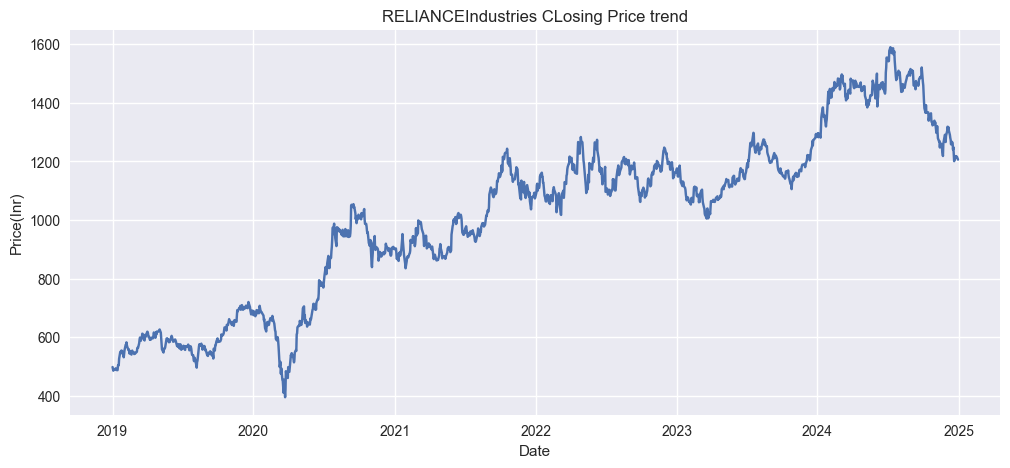

In [16]:
plt.figure(figsize=(12,5))
plt.plot(df['Date'],df['Close'])
plt.title("RELIANCEIndustries CLosing Price trend")
plt.xlabel("Date")
plt.ylabel("Price(Inr)")
plt.show()


In [19]:
df['Daily_Return']=df['Close'].pct_change()*100

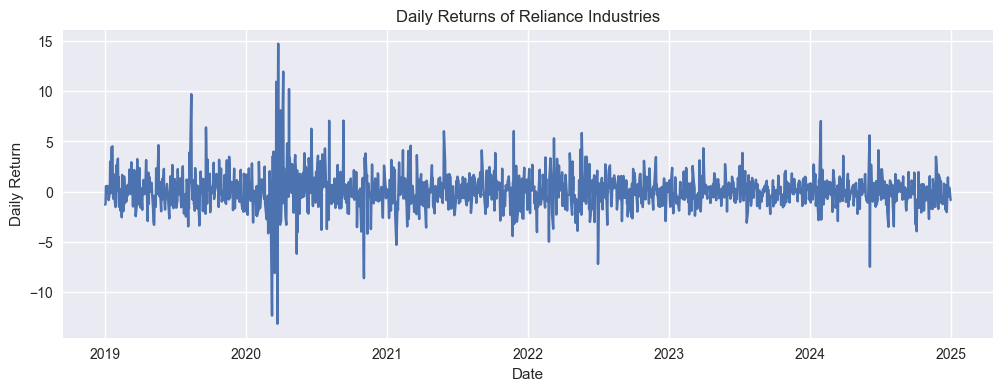

In [22]:
plt.figure(figsize=(12,4))
plt.plot(df['Date'], df['Daily_Return'])
plt.title("Daily Returns of Reliance Industries")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.show()


In [23]:
df['Daily_Return'].std()


np.float64(1.8462796929124394)

##Trading Volume Analysis

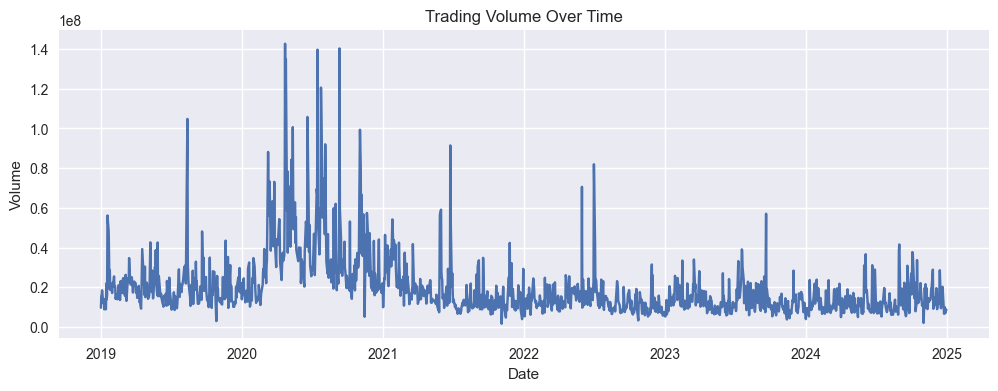

In [26]:
plt.figure(figsize=(12,4))
plt.plot(df['Date'], df['Volume'])
plt.title("Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()


Moving Average Analysis

In [27]:
df['MA_20'] = df['Close'].rolling(20).mean()
df['MA_50'] = df['Close'].rolling(50).mean()


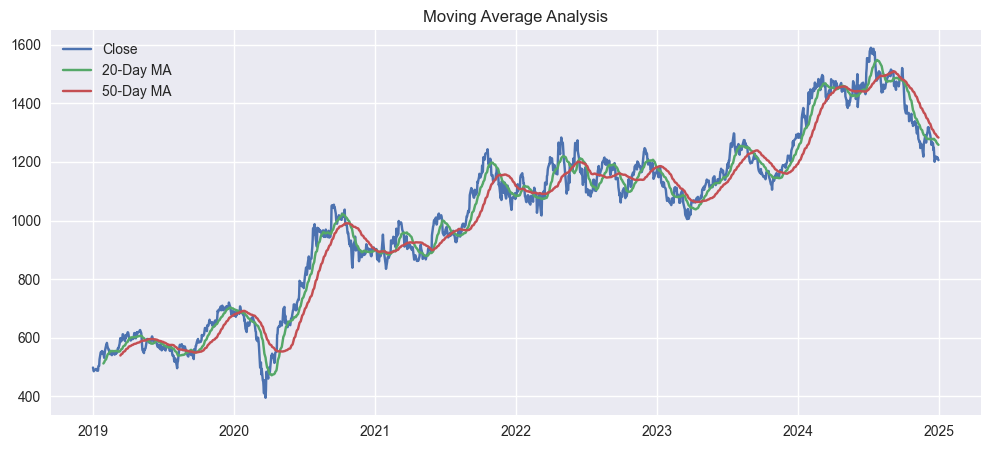

In [28]:
plt.figure(figsize=(12,5))
plt.plot(df['Date'], df['Close'], label='Close')
plt.plot(df['Date'], df['MA_20'], label='20-Day MA')
plt.plot(df['Date'], df['MA_50'], label='50-Day MA')
plt.legend()
plt.title("Moving Average Analysis")
plt.show()